### **load libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from wordcloud import WordCloud

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **load Data**

In [2]:
df = pd.read_csv(r'/content/spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### **Data exploration**

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4577,spam,Urgent! call 09066350750 from your landline. Y...,NaN,NaN,NaN
3538,ham,What happen dear. Why you silent. I am tensed,NaN,NaN,NaN


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [10]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [11]:
d = df.isnull().sum()
d[d > 0]

,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


<Axes: >

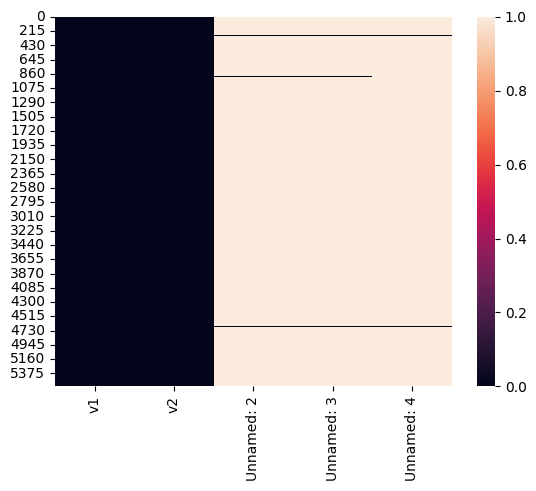

In [12]:
sns.heatmap(df.isnull())

### **Data Cleaning**

In [13]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [18]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.rename(columns={'v1': 'Category','v2':'Description'}, inplace=True)
df

,Category,Description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### **Data Analysis**

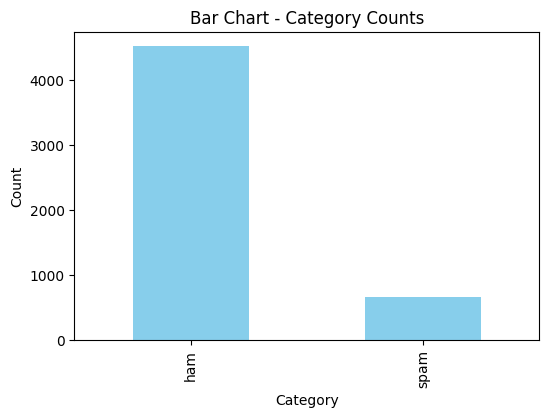

In [20]:
plt.figure(figsize=(6, 4))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart - Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

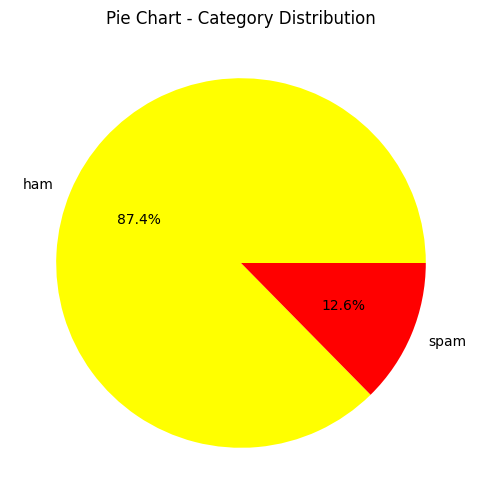

In [21]:
plt.figure(figsize=(6, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'red', 'green'])
plt.title('Pie Chart - Category Distribution')
plt.ylabel('')
plt.show()

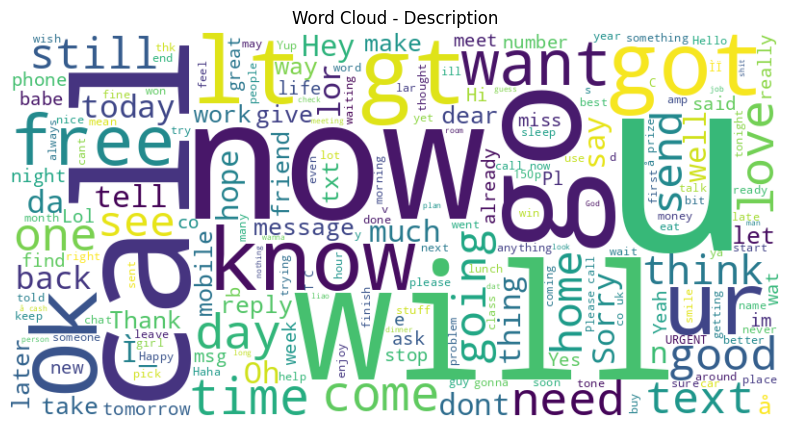

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Description')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


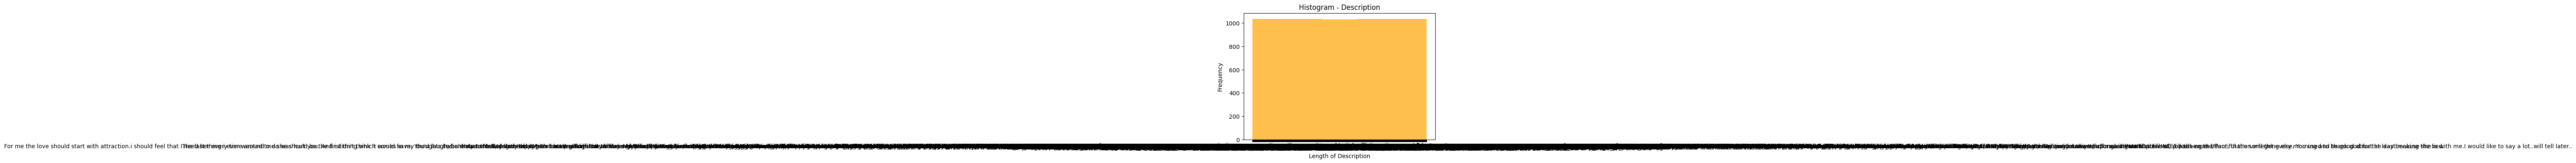

In [23]:
plt.figure(figsize=(6, 4))
plt.hist(df['Description'], bins=5, color='orange', alpha=0.7)
plt.title('Histogram - Description')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()

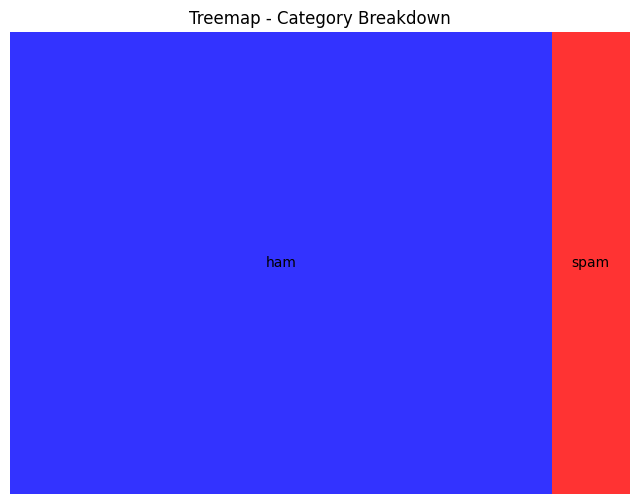

In [24]:
!pip install squarify
import squarify

plt.figure(figsize=(8, 6))
category_counts = df['Category'].value_counts()
squarify.plot(sizes=category_counts, label=category_counts.index, alpha=0.8, color=['blue', 'red', 'orange'])
plt.title('Treemap - Category Breakdown')
plt.axis('off')
plt.show()

### **Data transformation**

In [28]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

df['Description'] = df['Description'].apply(clean_text)
print(df)

     Category                                        Description
0         ham  go jurong point crazy available bugis n great ...
1         ham                            ok lar joking wif u oni
2        spam  free entry wkly comp win fa cup final tkts st ...
3         ham                u dun say early hor u c already say
4         ham           nah dont think go usf life around though
...       ...                                                ...
5567     spam  nd time tried contact u u pound prize claim ea...
5568      ham                          b going esplanade fr home
5569      ham                         pity mood soany suggestion
5570      ham  guy bitching acted like id interested buying s...
5571      ham                                     rofl true name

[5169 rows x 2 columns]


### **Create model**

In [29]:
df

,Category,Description
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though
...,...,...
5567,spam,nd time tried contact u u pound prize claim ea...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...


In [35]:
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(df['Description'])

print(tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41264 stored elements and shape (5169, 7844)>
  Coords	Values
  (0, 2638)	0.15434059346967133
  (0, 3468)	0.348793998018701
  (0, 5064)	0.23840196910399428
  (0, 1443)	0.26945020974981504
  (0, 455)	0.26945020974981504
  (0, 876)	0.2942038539047452
  (0, 2728)	0.1959439734784074
  (0, 7596)	0.24630407308130334
  (0, 3612)	0.285416803357629
  (0, 874)	0.332827404410887
  (0, 1180)	0.2942038539047452
  (0, 2691)	0.16333992736160083
  (0, 230)	0.348793998018701
  (0, 7376)	0.1993334594556703
  (1, 4654)	0.27852067356750737
  (1, 3645)	0.40670634839035563
  (1, 3438)	0.5230619222770149
  (1, 7498)	0.4302122886209653
  (1, 4685)	0.5462048999760711
  (2, 2443)	0.1248042972754599
  (2, 2056)	0.38823548989287676
  (2, 7552)	0.21297812408316608
  (2, 1288)	0.21297812408316608
  (2, 7511)	0.161835874048825
  (2, 2186)	0.5205404202948087
  :	:
  (5164, 863)	0.37804678010878
  (5165, 3005)	0.3679511092483737
  (5165, 2653)	0.36378179678

# **Create Model**

In [45]:
X = tfidf.toarray()
y = df['Category']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44,
                                    shuffle=True)

In [58]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()

In [59]:
accuracies = []

def all(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

In [60]:
all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)

accuracy = 0.9451966473243069
accuracy = 0.8929722759509994
accuracy = 0.9774339136041263
accuracy = 0.9658284977433914
accuracy = 0.950354609929078
accuracy = 0.9587362991618311


In [61]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
new

,algorithms,accuracies
0,LogisticRegression,0.945197
1,GaussianNB,0.892972
2,MLPClassifier,0.977434
3,RandomForestClassifier,0.965828
4,DecisionTreeClassifier,0.950355
5,GradientBoostingClassifier,0.958736


In [62]:
modelx = MLPClassifier()
modelx.fit(X_train,y_train)
prex = modelx.predict(X_test)
accuracy_score(prex,y_test)

0.9787234042553191

In [63]:
print(modelx.score(X_train,y_train))
print(modelx.score(X_test,y_test))

1.0
0.9787234042553191


In [64]:
acc = accuracy_score(y_test, prex)
print('Accuracy:',acc)

Accuracy: 0.9787234042553191


In [65]:
cm = confusion_matrix(y_test, prex)
print('Confusion Matrix:',cm)

Confusion Matrix: [[1358    1]
 [  32  160]]


<Axes: >

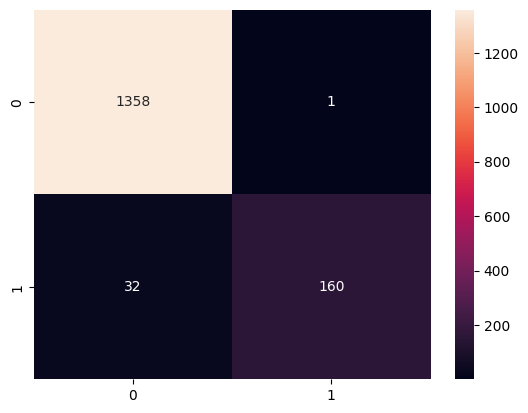

In [66]:
sns.heatmap(cm,annot=True,fmt='g')

In [67]:
cr = classification_report(y_test, prex)
print('Classification Report:',cr)

Classification Report:               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1359
        spam       0.99      0.83      0.91       192

    accuracy                           0.98      1551
   macro avg       0.99      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [70]:
import pickle

with open("model.Spam", "wb") as f:
    pickle.dump(modelx, f)